___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `Roi Jared Flores Garza Stone` </Strong>
- <Strong> `Rafael Takata García` </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `roi.flores@iteso.mx` </font>
- <Strong> Email: </Strong>  <font color="blue"> `rafael.takata@iteso.mx` </font>
___




### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido sobre la preparación de datos y construcción de modelos predictivos tanto para problemas de regresión como de clasificación.  Se busca abordar la construcción de los modelos, fundamentar por medio de la comunicación de resultados, evaluación de las predicciones del modelo y la metodología establecida para la preparación de los datos. 


### Entrega 1:


# Regresión

### Definición del problema:

La NBA (National Basketball Association), fundada en 1946 en Estados Unidos, es ampliamente reconocida como la liga de baloncesto profesional más prestigiosa y competitiva del mundo. Con equipos distribuidos en ciudades de Estados Unidos y Canadá, la NBA ha atraído a los mejores jugadores de diversos países, convirtiéndose en un fenómeno global que trasciende fronteras y culturas.

Al igual que en otras ligas estadounidenses, la NBA registra meticulosamente estadísticas y datos de cada partido, lo que permite un análisis profundo del rendimiento de los jugadores, patrones de juego, y proyecciones sobre el éxito de los equipos. Esta abundancia de información es clave para optimizar estrategias, tomar decisiones y entender el impacto de cada jugador en la cancha.

En este análisis, utilizaremos los datos de la temporada 2023 para predecir la cantidad de puntos que anotarán los jugadores, una métrica fundamental para evaluar el rendimiento en el juego. El conjunto de datos se ha obtenido de Kaggle y puede consultarse en el siguiente enlace: [NBA Players Stats 2023 Season](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season?resource=download).

##### Las variables que contiene el dataset son las siguientes:

| Descripción                                                                                       | Columna |
|--------------------------------------------------------------------------------------------------|---------|
| Nombre del jugador de baloncesto                                                                  | PName   |
| Posición del jugador en el juego, incluyendo 'N/A'                                               | POS     |
| Abreviatura del equipo para el cual el jugador juega en esta temporada                           | Team    |
| Edad del jugador                                                                                 | Age     |
| Número total de juegos que el jugador ha jugado esta temporada                                   | GP      |
| Número total de juegos ganados por el jugador                                                    | W       |
| Número total de juegos perdidos por el jugador                                                   | L       |
| Total de minutos jugados por el jugador en esta temporada                                        | Min     |
| Total de puntos anotados por el jugador [objetivo]                                               | PTS     |
| Total de tiros de campo acertados por el jugador                                                 | FGM     |
| Total de tiros de campo intentados por el jugador                                                | FGA     |
| Porcentaje de éxito en tiros de campo realizados por el jugador                                  | FG%     |
| Total de tiros de 3 puntos acertados por el jugador                                              | 3PM     |
| Total de tiros de 3 puntos intentados por el jugador                                             | 3PA     |
| Porcentaje de éxito en tiros de 3 puntos realizados por el jugador                               | 3P%     |
| Total de tiros libres acertados por el jugador                                                   | FTM     |
| Total de tiros libres intentados por el jugador                                                  | FTA     |
| Porcentaje de éxito en tiros libres realizados por el jugador                                    | FT%     |
| Total de rebotes ofensivos realizados por el jugador                                             | OREB    |
| Total de rebotes defensivos realizados por el jugador                                            | DREB    |
| Total de rebotes (ofensivos + defensivos) realizados por el jugador                              | REB     |
| Total de asistencias realizadas por el jugador                                                   | AST     |
| Total de pérdidas de balón realizadas por el jugador                                             | TOV     |
| Total de robos realizados por el jugador                                                         | STL     |
| Total de bloqueos realizados por el jugador                                                      | BLK     |
| Total de faltas personales realizadas por el jugador                                             | PF      |
| Total de puntos de fantasía de la NBA realizados por el jugador                                  | FP      |
| Total de dobles-dobles realizados por el jugador                                                 | DD2     |
| Total de triples-dobles realizados por el jugador                                                | TD3     |
| Diferencia total entre la puntuación del equipo del jugador y la del oponente mientras él juega  | +/-     |


##### Librerías a usar:

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
import seaborn as sns
import math
import scipy.stats as stats
from imblearn.over_sampling import SMOTE


In [510]:
df = pd.read_csv('../docs/2023_nba_player_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [512]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


A manera de irnos adentrando en los datos, revisaremos algunas gráficas que nos parecen interesantes de saber para conocer un poco más sobre nuestro problema.

La posición del jugador vs los puntos:

Text(0.5, 1.0, 'POS vs PTS')

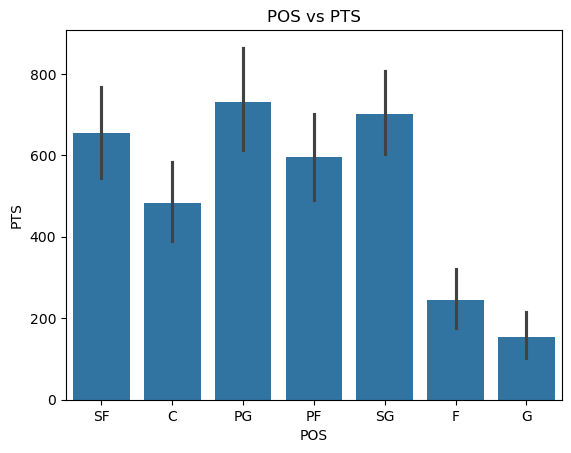

In [513]:
ax = sns.barplot(x= 'POS', y = 'PTS', data = df)
ax.set_title('POS vs PTS')

Vemos mucha variabilidad en la media de puntos anotados dependiendo de la posición del jugador. Esta puede ser una buena variable para predecir la variable objetivo.

Veamos la relación entre los tiros intentados y los puntos.

Text(0.5, 0.98, 'FGA vs PTS')

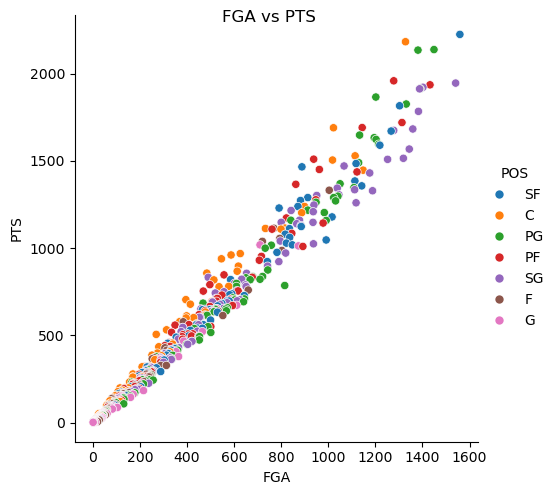

In [514]:
ax = sns.relplot(x = 'FGA', y = 'PTS', data = df, hue = 'POS')
ax.fig.suptitle('FGA vs PTS')

'You Miss 100% of the Shots You Don't Take' -Wayne Gretzky

En el baloncesto, uno de los momentos que suelen definir los partidos son los tiros libres. Estos son lanzamientos sin oposición desde una distancia definida, otorgados como penalización al equipo contrario tras cometer algún tipo de falta. Veamos si el porcentaje de tiros libres acertados influye en los puntos.

Text(0.5, 0.98, 'FGA vs PTS')

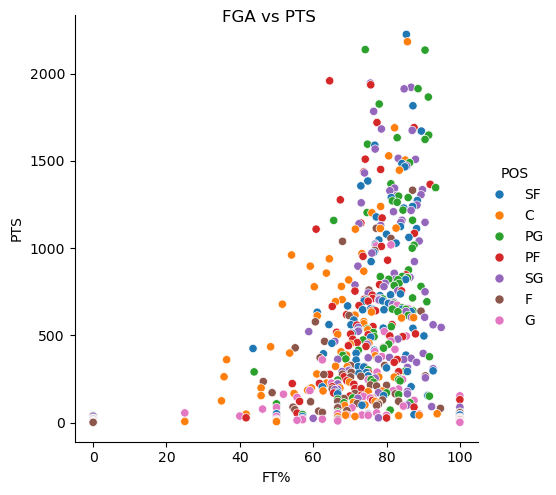

In [515]:
ax = sns.relplot(x = 'FT%', y = 'PTS', data = df, hue = 'POS')
ax.fig.suptitle('FGA vs PTS')

Esta variable esta mucho más dispersa pero es interesante ver como las personas que tienen 100% no tienen tantos puntos, nos dice que no lo han intentado lo suficiente como para fallar.

<Axes: xlabel='Min', ylabel='Count'>

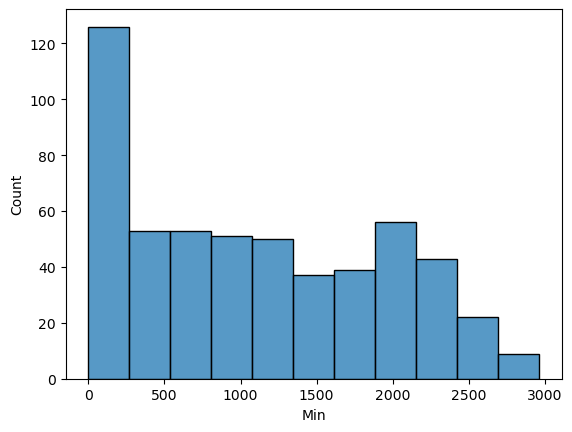

In [516]:
sns.histplot(x='Min', data = df)

A través de esta gráfica y la interpretación de la información general que nos proporcionó el analisis rápido del dataset, nos damos cuenta que existe una gran cantidad de jugadores que no jugaron ni siquiera 1/4 de la temporada y mueven nuestros datos de manera significativa.

## Limpieza de datos

### Filtrado de jugadores

Para eliminar este sesgo, vamos a eliminar a ciertos jugadores que no cumplan cierto requisito de minutos jugados en la temporada:
Una temporada se compone de 82 juegos, cada uno de 48 minutos, si hacemos el cálculo: $$48 \text{ minutos} * 82\text{ partidos} =3936\text{ minutos totales}$$

En este caso solo vamos a considerar jugadores que participaron en al menos $\frac{1}{4}$ de la temporada, esto constaría en que un jugador tendría que tener al menos **984** minutos totales.

In [517]:
df_r = df[df["Min"] > 984]

In [518]:
print(f"Este filtro de jugadores nos quitó {df.shape[0] - df_r.shape[0]} columnas")

Este filtro de jugadores nos quitó 272 columnas


Una vez aplicado el filtro, separaremos los datos en entrenamiento y prueba.

In [519]:
#Tambien eliminare el nombre del jugador y el equipo para evitar el sobreajuste
X = df_r.drop(['PTS', 'PName', 'Team'], axis = 1)
y = df_r['PTS']

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=444)

In [521]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((213, 27), (213,), (54, 27), (54,))

Exploración de datos:

In [522]:
X_train.isna().sum()

POS     0
Age     0
GP      0
W       0
L       0
Min     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
PF      0
FP      0
DD2     0
TD3     0
+/-     0
dtype: int64

No tenemos valores nulos después de haber aplicado nuestro filtro.

Como no tenemos datos nulos, podemos seguir con la preparación. Se utilizará un LabelEncoder para la posición.

In [523]:
le = LabelEncoder()

In [524]:
X_train['POS'] = le.fit_transform(X_train['POS'])
X_test['POS'] = le.fit_transform(X_test['POS'])

Veamos si tenemos datos atípicos en el dataset.

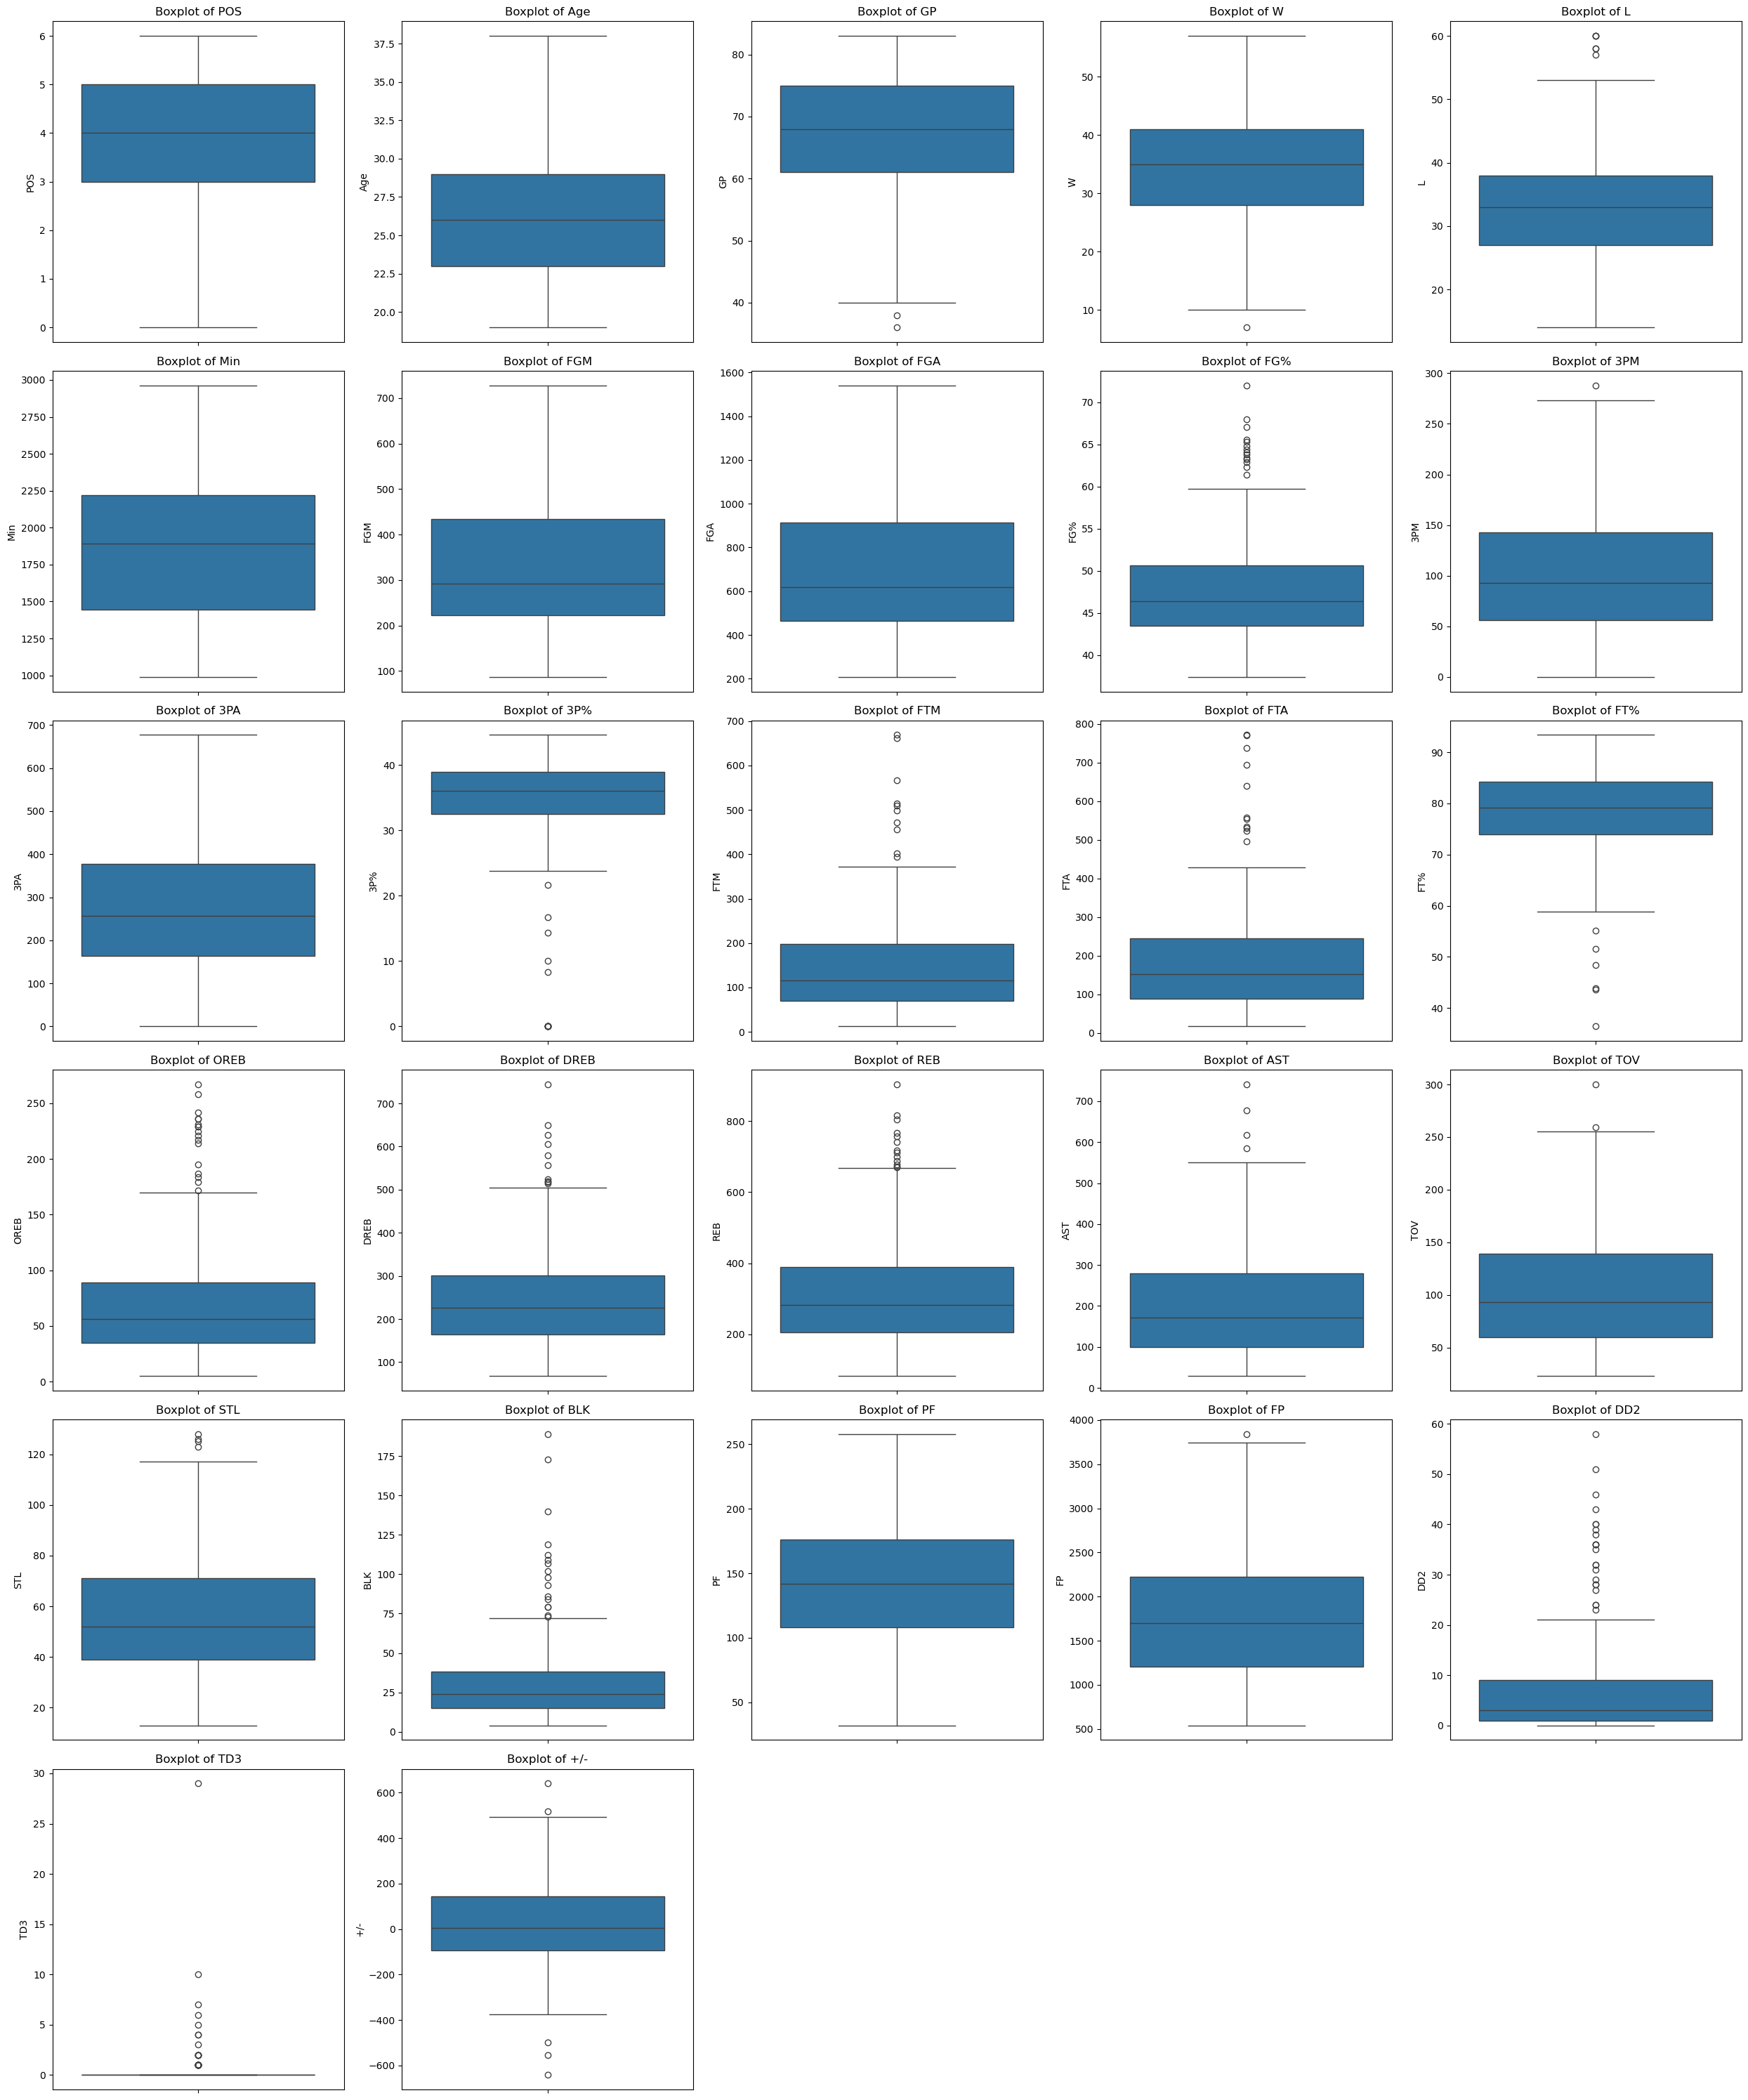

In [525]:
#Función creada para el gráfico de boxplots
def plot_boxplots(df):
    num_columns = df.shape[1]
    ncols = 5  
    nrows = math.ceil(num_columns / ncols)  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()  

    for i, col in enumerate(df.columns):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(X_train)

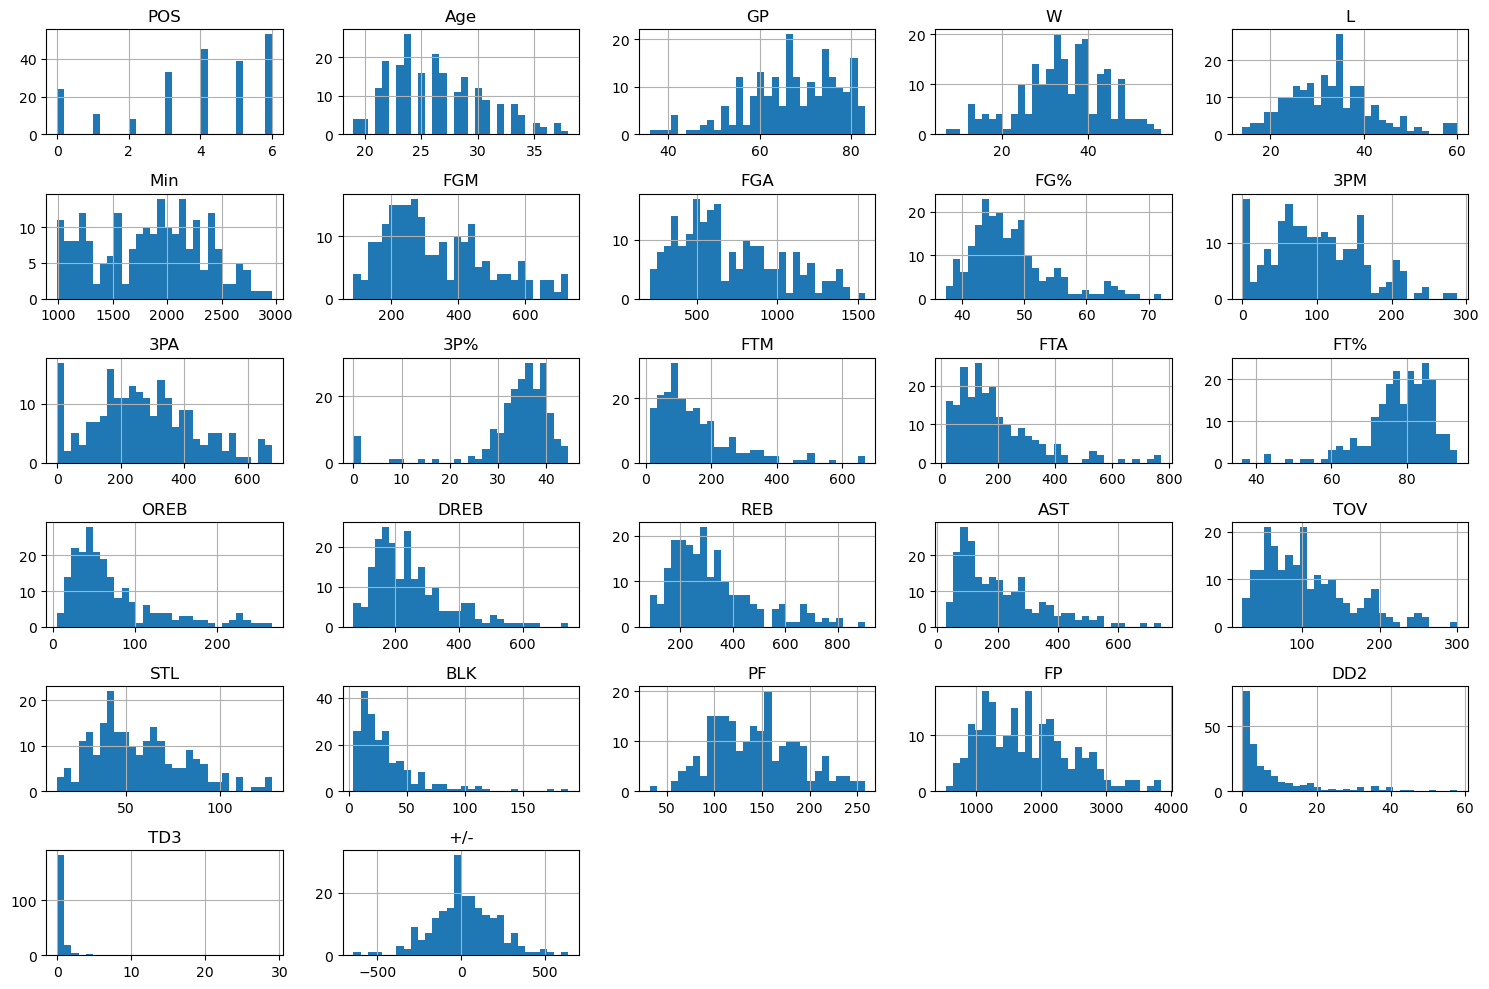

In [526]:
X_train.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Vemos distribuciones de todo tipo aunque, la mayoria tiene un sesgo a la derecha. Es necesario que corrijamos esto para mejorar el desempeño de nuestro modelo de regresión.

 Sin embargo, tenemos muchas features todavia y puede que algunas no nos sirvan de mucho para conseguir el resultado de la variable objetivo, veamos cuales son las más útiles.

In [527]:
co= X_train.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,POS,Age,GP,W,L,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
POS,1.00,0.03,0.06,0.09,-0.03,0.14,0.04,0.17,-0.50,0.46,0.46,0.42,-0.00,-0.05,0.35,-0.59,-0.44,-0.52,0.19,0.03,0.28,-0.45,-0.22,-0.06,-0.47,-0.10,0.08
Age,0.03,1.00,-0.16,0.12,-0.31,-0.00,-0.02,-0.01,-0.12,0.16,0.12,0.16,0.03,-0.00,0.17,-0.16,-0.00,-0.06,0.14,-0.01,-0.04,-0.15,-0.18,0.02,0.02,0.03,0.24
GP,0.06,-0.16,1.00,0.59,0.47,0.58,0.21,0.23,-0.02,0.19,0.21,0.07,0.06,0.07,0.05,0.23,0.31,0.31,0.10,0.15,0.32,0.18,0.48,0.28,0.07,-0.04,0.04
W,0.09,0.12,0.59,1.00,-0.44,0.37,0.17,0.16,-0.00,0.22,0.20,0.15,0.06,0.06,0.07,0.06,0.22,0.18,0.12,0.07,0.21,0.09,0.18,0.22,0.10,0.08,0.64
L,-0.03,-0.31,0.47,-0.44,1.00,0.24,0.05,0.08,-0.02,-0.03,0.01,-0.09,0.00,0.01,-0.02,0.20,0.11,0.15,-0.02,0.09,0.13,0.11,0.34,0.08,-0.03,-0.13,-0.66
Min,0.14,-0.00,0.58,0.37,0.24,1.00,0.77,0.80,-0.05,0.51,0.54,0.08,0.58,0.57,0.29,0.20,0.53,0.45,0.56,0.66,0.59,0.19,0.55,0.82,0.35,0.13,0.24
FGM,0.04,-0.02,0.21,0.17,0.05,0.77,1.00,0.97,0.13,0.44,0.48,0.05,0.82,0.82,0.28,0.17,0.57,0.48,0.60,0.82,0.43,0.19,0.34,0.94,0.53,0.28,0.28
FGA,0.17,-0.01,0.23,0.16,0.08,0.80,0.97,1.00,-0.11,0.59,0.64,0.15,0.79,0.77,0.37,0.00,0.45,0.33,0.65,0.82,0.46,0.06,0.30,0.89,0.40,0.22,0.23
FG%,-0.50,-0.12,-0.02,-0.00,-0.02,-0.05,0.13,-0.11,1.00,-0.54,-0.59,-0.50,0.11,0.18,-0.46,0.68,0.43,0.55,-0.15,0.01,-0.14,0.54,0.19,0.19,0.42,0.14,0.11
3PM,0.46,0.16,0.19,0.22,-0.03,0.51,0.44,0.59,-0.54,1.00,0.99,0.55,0.26,0.20,0.51,-0.45,-0.05,-0.19,0.35,0.33,0.29,-0.28,0.01,0.35,-0.11,0.00,0.20


Existen correlaciones muy fuertes entre las variables, lo siguiente es reducir la dimensionalidad a través de eliminar aquellas relaciones que tengan un Threshold mayor a 0.6

In [528]:
#Funciones del notebook: FeatureSelection.ipynb por Sara Eugenia Rodriguez Reyes
def calcDrop(res):
    # Obtener todas las variables con una correlacion  > 0.6
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # Todas las variables únicas en las columnas a remover
    poss_drop = list(set(res['drop'].tolist()))

    # Quedarse con las variables que no estén en las variables a remover
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop
def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    
    # Concatenate all collected Series into a DataFrame
    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X_train)
print(drop)

['REB', '+/-', 'TOV', 'FGM', 'OREB', 'FP', 'DREB', '3PA', 'FTA', 'FGA']


C:\Users\Rafa\AppData\Local\Temp\ipykernel_18616\1686929084.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
C:\Users\Rafa\AppData\Local\Temp\ipykernel_18616\1686929084.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


Vemos que esta función eliminó 15 columnas en total, analizemos otra vez las correlaciones.

In [529]:
co_post= X_train.drop(drop, axis = 1).corr()
co_post.style.background_gradient(cmap='coolwarm').format(precision=2)

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
POS,1.00,0.03,0.06,0.09,-0.03,0.14,-0.50,0.46,0.42,-0.00,0.35,0.19,0.28,-0.45,-0.22,-0.47,-0.10
Age,0.03,1.00,-0.16,0.12,-0.31,-0.00,-0.12,0.16,0.16,0.03,0.17,0.14,-0.04,-0.15,-0.18,0.02,0.03
GP,0.06,-0.16,1.00,0.59,0.47,0.58,-0.02,0.19,0.07,0.06,0.05,0.10,0.32,0.18,0.48,0.07,-0.04
W,0.09,0.12,0.59,1.00,-0.44,0.37,-0.00,0.22,0.15,0.06,0.07,0.12,0.21,0.09,0.18,0.10,0.08
L,-0.03,-0.31,0.47,-0.44,1.00,0.24,-0.02,-0.03,-0.09,0.00,-0.02,-0.02,0.13,0.11,0.34,-0.03,-0.13
Min,0.14,-0.00,0.58,0.37,0.24,1.00,-0.05,0.51,0.08,0.58,0.29,0.56,0.59,0.19,0.55,0.35,0.13
FG%,-0.50,-0.12,-0.02,-0.00,-0.02,-0.05,1.00,-0.54,-0.50,0.11,-0.46,-0.15,-0.14,0.54,0.19,0.42,0.14
3PM,0.46,0.16,0.19,0.22,-0.03,0.51,-0.54,1.00,0.55,0.26,0.51,0.35,0.29,-0.28,0.01,-0.11,0.00
3P%,0.42,0.16,0.07,0.15,-0.09,0.08,-0.50,0.55,1.00,0.02,0.57,0.13,0.08,-0.36,-0.19,-0.30,0.02
FTM,-0.00,0.03,0.06,0.06,0.00,0.58,0.11,0.26,0.02,1.00,0.31,0.56,0.33,0.16,0.27,0.47,0.27


Ya no están tan correlacionadas las variables como antes, esto nos viene perfecto para el entrenamiento de los modelos de regresión así que, con estas variables lo haremos.

In [530]:
X_train_nocorr = X_train.drop(drop, axis = 1)
X_train_nocorr.head()

,POS,Age,GP,W,L,Min,FG%,3PM,3P%,FTM,FT%,AST,STL,BLK,PF,DD2,TD3
76,6,22,59,18,41,2023.9,44.2,141,36.6,207,78.4,338,82,17,156,9,1
38,6,22,73,40,33,2475.5,43.4,121,31.0,290,74.0,201,31,15,179,3,0
124,4,37,59,33,26,1888.6,44.0,98,37.5,133,83.1,524,91,22,126,17,0
96,2,24,74,36,38,2272.4,38.8,135,33.0,200,77.2,154,75,23,243,5,0
16,0,28,69,48,21,2323.0,63.2,57,38.3,341,82.2,678,87,47,174,58,29


In [531]:
X_test_nocorr = X_test.drop(drop, axis=1)

Por último, veamos si quedaron algunos outliers en las variables que seleccionamos.

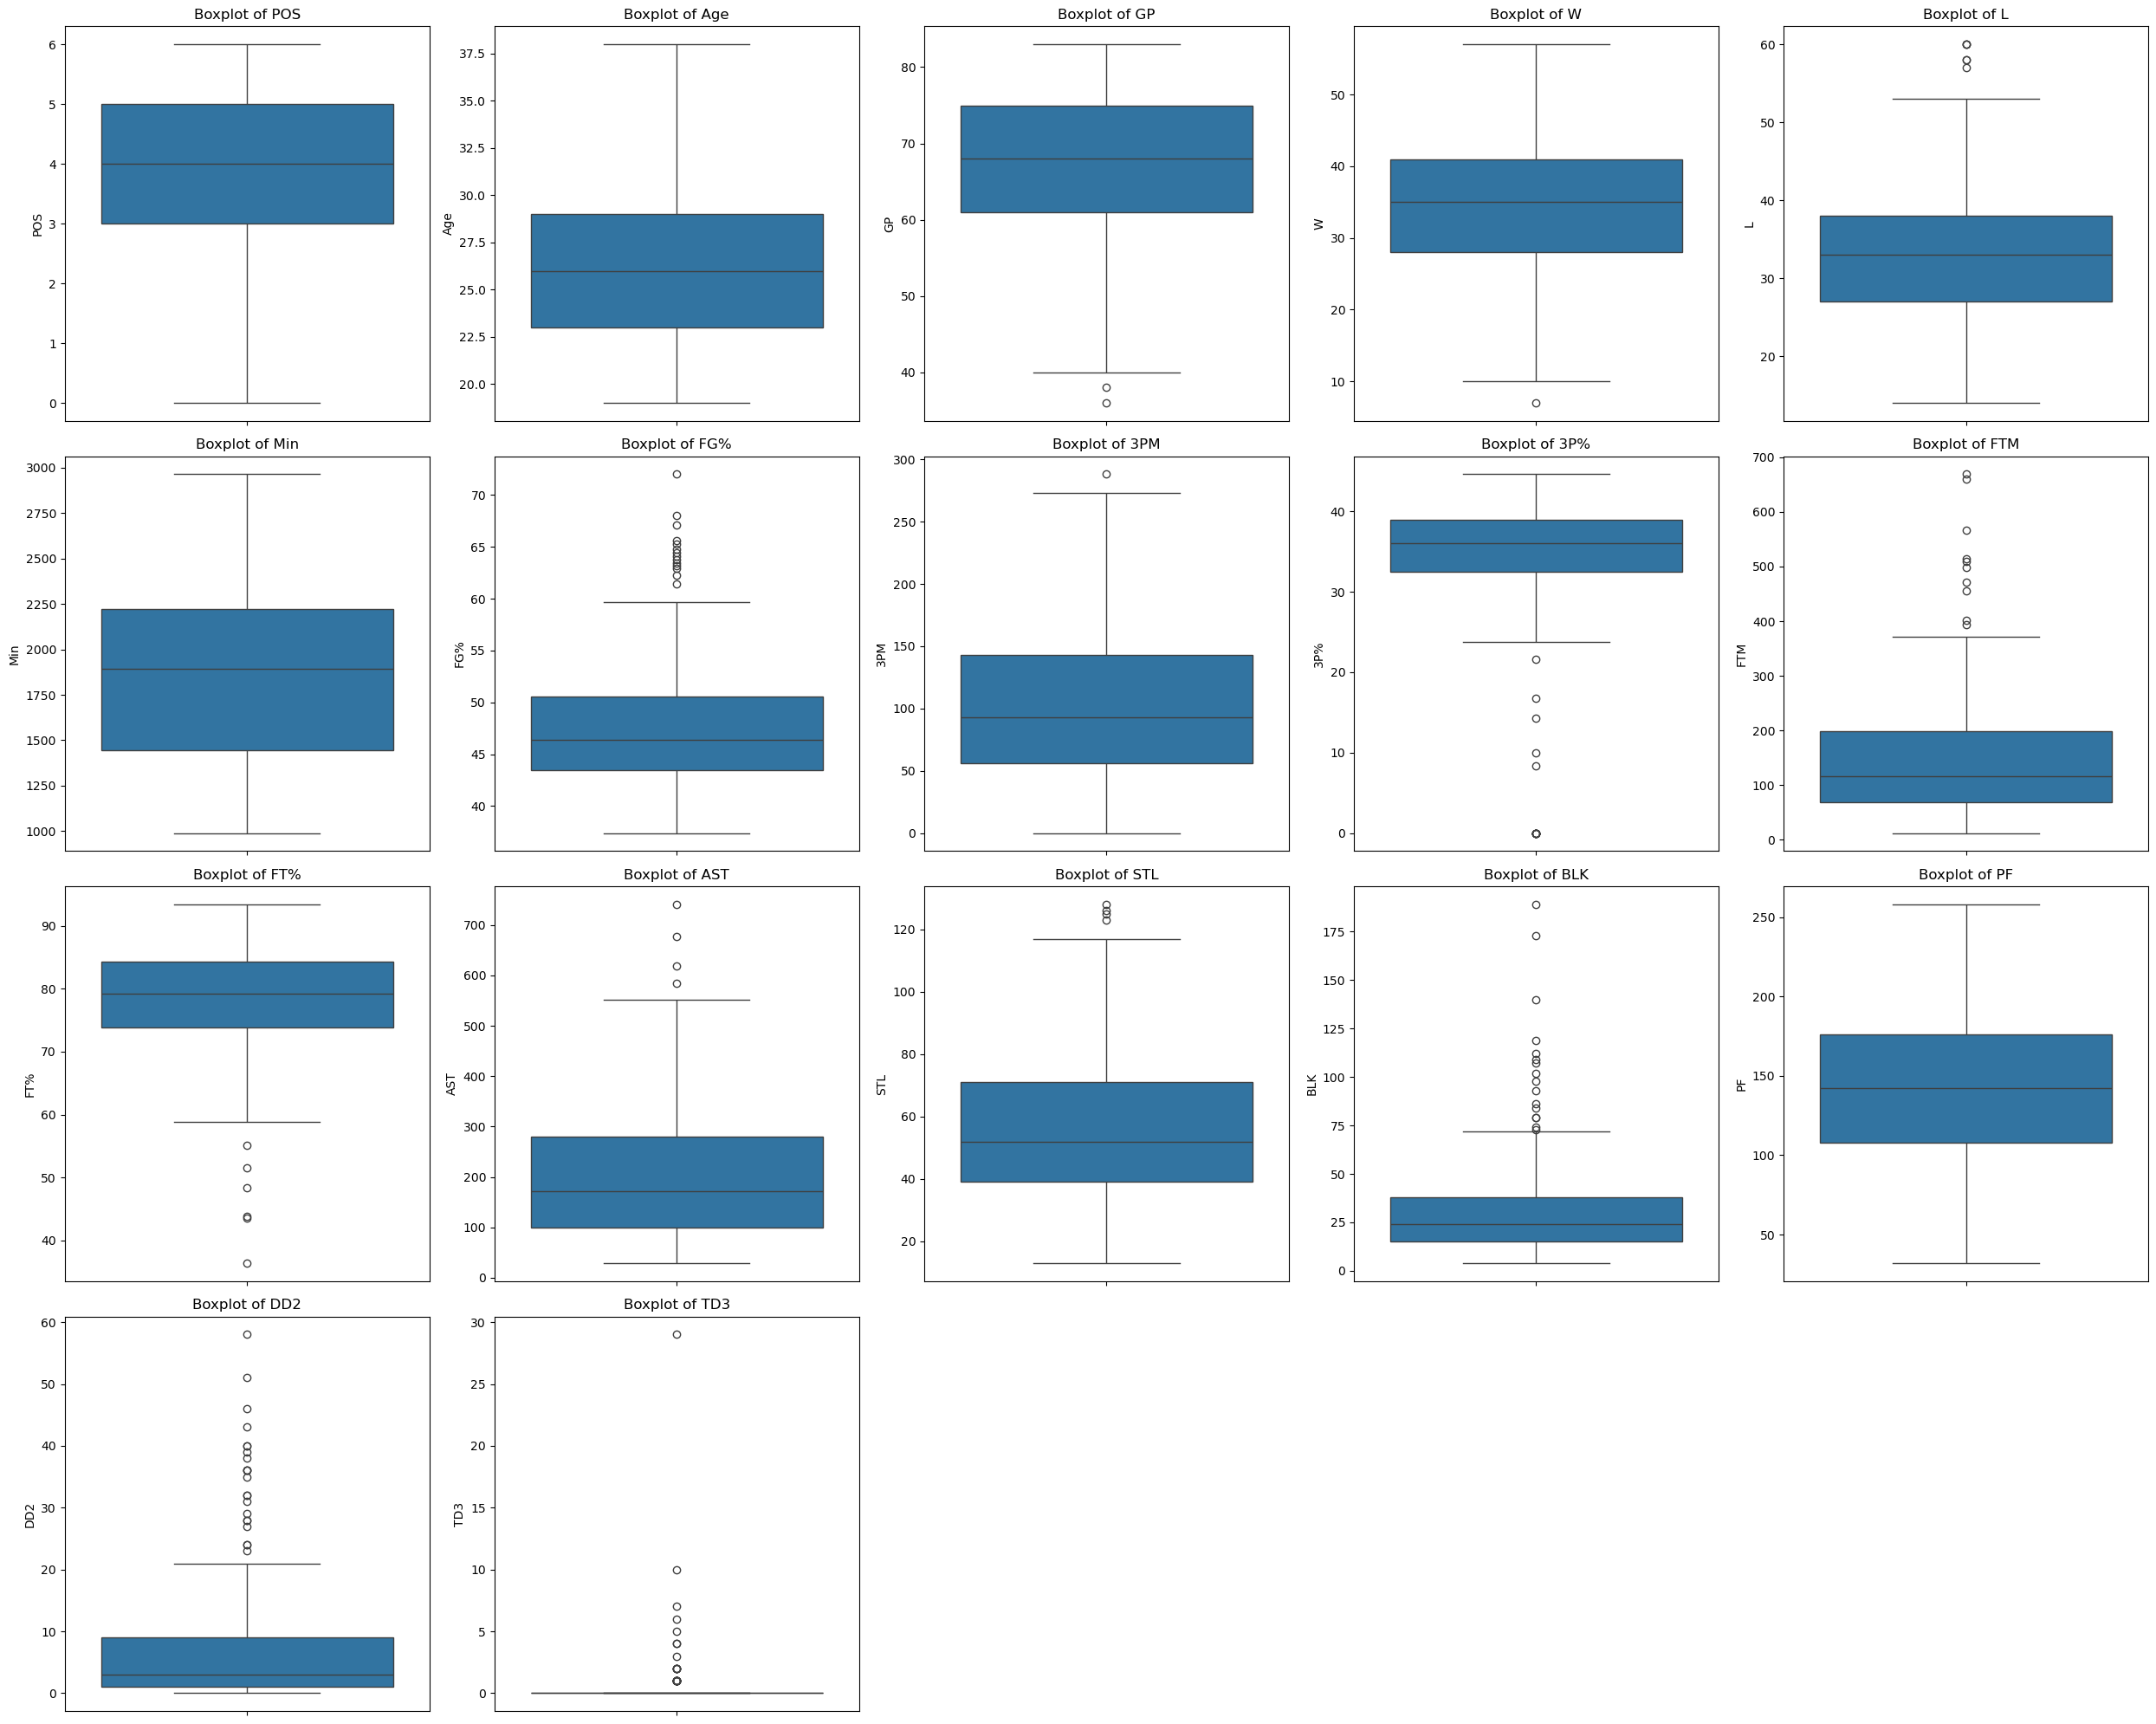

In [532]:
plot_boxplots(X_train_nocorr)

## Modelado para regresión:

**Falta poner la predicción de cual será el mejor modelo para el dataset**

Para poder maximizar los rendimientos de algunos modelos como Regresión Lineal y SVM, vamos a estandarizar y normalizar los datos, aunque mantendremos la data original para el resto de los modelos.

Las bibliotecas que usaremos para evaluar el desempeño de los modelos son:

In [533]:
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [534]:
scaler = StandardScaler()
norm = Normalizer()

X_train_st = scaler.fit_transform(X_train_nocorr)
X_train_nm = norm.fit_transform(X_train_nocorr)

X_test_st = scaler.fit_transform(X_test_nocorr)
X_test_nm = norm.fit_transform(X_test_nocorr)

In [535]:
X_test_st_df = pd.DataFrame(X_test_st, columns= X_test_nocorr.columns)
X_train_st_df = pd.DataFrame(X_train_st, columns=X_train_nocorr.columns)
X_test_nm_df = pd.DataFrame(X_test_nm, columns=X_train_nocorr.columns)
X_train_nm_df = pd.DataFrame(X_train_nm, columns=X_train_nocorr.columns)

### Support Vector Machine (SVM)

In [536]:
from sklearn.svm import SVR

In [537]:
parametros_svm = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": [0.01, 1, 1],
    "gamma" : ["scale", "auto", 0.005, 0.05, 0.5, 5]
}

svm = SVR()

grid = GridSearchCV(estimator= svm, param_grid= parametros_svm, scoring="neg_mean_squared_error", cv=4 , verbose=1, error_score="raise")
grid.fit(X_train_nm_df, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, error_score='raise', estimator=SVR(),
             param_grid={'C': [0.01, 1, 1],
                         'gamma': ['scale', 'auto', 0.005, 0.05, 0.5, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [538]:
print(f"Los mejores parámetros fueron {grid.best_params_}")

Los mejores parámetros fueron {'C': 1, 'gamma': 5, 'kernel': 'poly'}


In [539]:
svr_tuneado = SVR(kernel="poly", C=100, gamma=5)
svr_tuneado.fit(X_train_nm_df, y_train)

SVR(C=100, gamma=5, kernel='poly')

In [540]:
y_hat = svr_tuneado.predict(X_test_nm_df)
r2 = metrics.r2_score(y_test, y_hat)
mse = metrics.mean_squared_error(y_test,  y_hat)

print(f"R2: {r2}")
print(f"mse: {mse}")

R2: 0.8886726416784003
mse: 21023.517742605443


### Regresión Lineal

In [541]:
from sklearn.linear_model import LinearRegression

In [542]:
LR = LinearRegression()
LR.fit(X_train_st_df, y_train)

y_hat = LR.predict(X_test_st_df)

In [543]:
r2 = metrics.r2_score(y_test, y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)

print(f"R2: {r2}")
print(f"mse: {mse}")

R2: 0.9391534011126567
mse: 11490.522820005406


### XGBOOST

In [544]:
import xgboost as xgb

In [545]:
model = xgb.XGBRegressor(objective= "reg:squarederror", seed=45)
model.fit(X_train_nocorr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Sin tuneo de hiperparámetros

In [546]:
y_hat = model.predict(X_test_nocorr)

r2 = metrics.r2_score(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)

print(f"r2: {r2}")
print(f"mse: {mse}")

r2: 0.8964798450469971
mse: 19549.17849948247


#### Tuneo de hiperparámetros

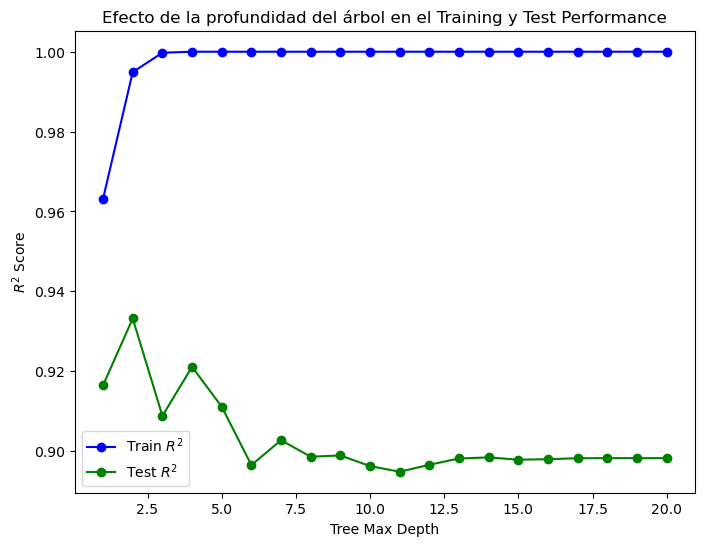

In [547]:
max_depth = range(1, 21)
train_scores = []
test_scores = list()

for depth in max_depth:
    xg_reg = xgb.XGBRegressor(max_depth= depth, objective="reg:squarederror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depth, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()
    

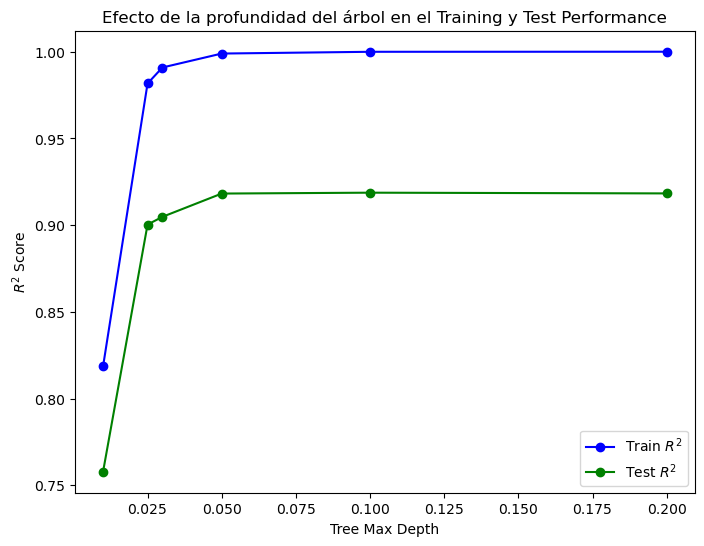

In [548]:
eta = [0.01, 0.025, 0.03, 0.05, 0.1, 0.2]
train_scores = []
test_scores = list()

for value in eta:
    xg_reg = xgb.XGBRegressor(learning_rate= value, objective="reg:squarederror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(eta, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(eta, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()

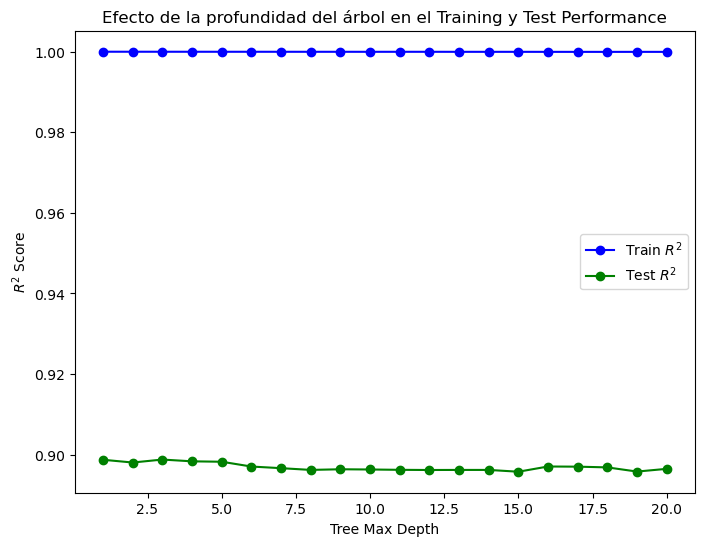

In [549]:
gammas = range(1, 21)
train_scores = []
test_scores = list()

for gamma in gammas:
    xg_reg = xgb.XGBRegressor(gamma= gamma, objective="reg:squarederror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(gammas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()

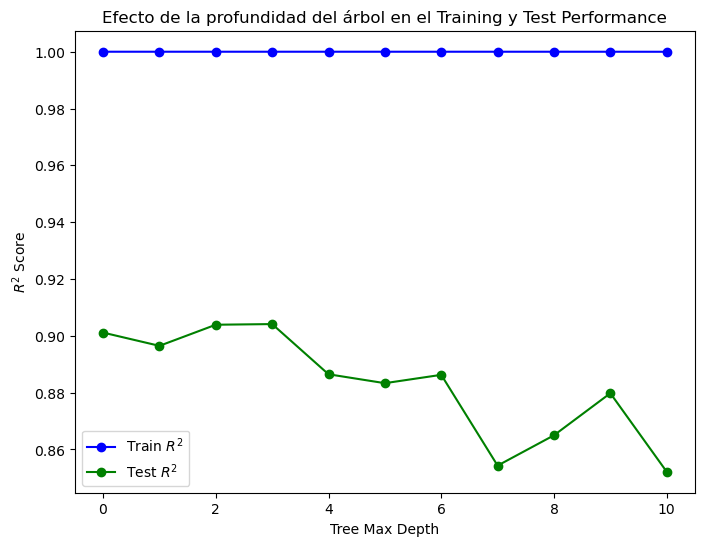

In [550]:
lambdas = range(0, 11)
train_scores = []
test_scores = list()

for lambd in lambdas:
    xg_reg = xgb.XGBRegressor(reg_lambda= lambd, objective="reg:squarederror", seed = 22)
    xg_reg.fit(X_train_nocorr, y_train)
    train_scores.append(xg_reg.score(X_train_nocorr, y_train))
    test_scores.append(xg_reg.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(lambdas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()


In [551]:
gxb_param = {"reg_lambda": [2,3],
             "gamma": [2, 3, 4],
             "learning_rate": [0.02, 0.025, 0.03],
             "max_depth": [1, 2]}

gxb = xgb.XGBRegressor(objective="reg:squarederror", seed= 22)

grid = GridSearchCV(estimator= gxb, param_grid= gxb_param, scoring="neg_mean_squared_error", cv=4, verbose=1)

grid.fit(X_train_nocorr, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [2, 3, 4],
                         'learning_rate': [0.02, 0.025, 0.03],
                         'max_depth': [1, 2], 'reg_lambda': [2, 3]},
             scoring='neg_mean_squared_error', verbose=1)

In [552]:
print(f"Los mejores parámetros fueron {grid.best_params_}")

Los mejores parámetros fueron {'gamma': 2, 'learning_rate': 0.03, 'max_depth': 2, 'reg_lambda': 2}


#### Evaluación XGBOOST con hiperparámetros seleccionados

In [553]:
nuevo_xgb = xgb.XGBRegressor(objective="reg:squarederror", gamma=2, learning_rate=0.03, max_depth=2, reg_lambda=2)

nuevo_xgb.fit(X_train_nocorr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [554]:
y_hat_nuevo = nuevo_xgb.predict(X_test_nocorr)

r2_nuevo = metrics.r2_score(y_test, y_hat_nuevo)
mse_nuevo = metrics.mean_squared_error(y_test, y_hat_nuevo)

print(f"EL nuevo score R2: {r2_nuevo}")
print(f"El nuevo score mse: {mse_nuevo}")

EL nuevo score R2: 0.8785457611083984
El nuevo score mse: 22935.917880296933


### Random Forest

In [555]:
from sklearn.ensemble import RandomForestRegressor  

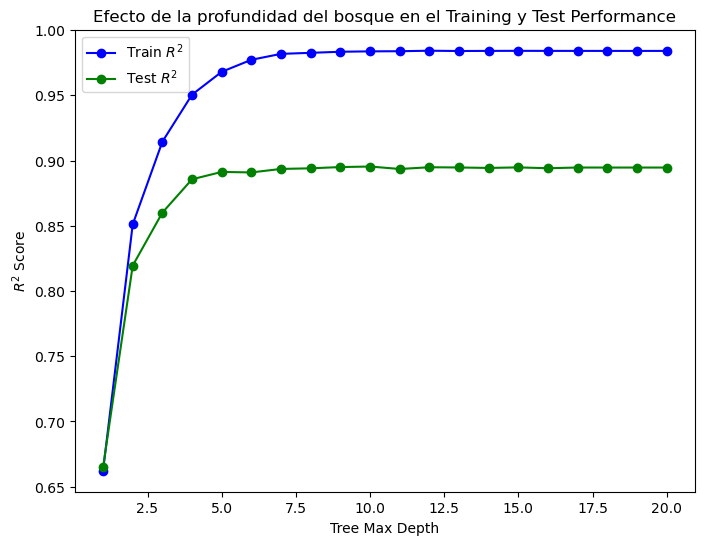

In [556]:
max_depth = range(1,21)
train_scores = []
test_scores = []

for depth in max_depth:
    tree = RandomForestRegressor(max_depth=depth, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))

plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depth, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

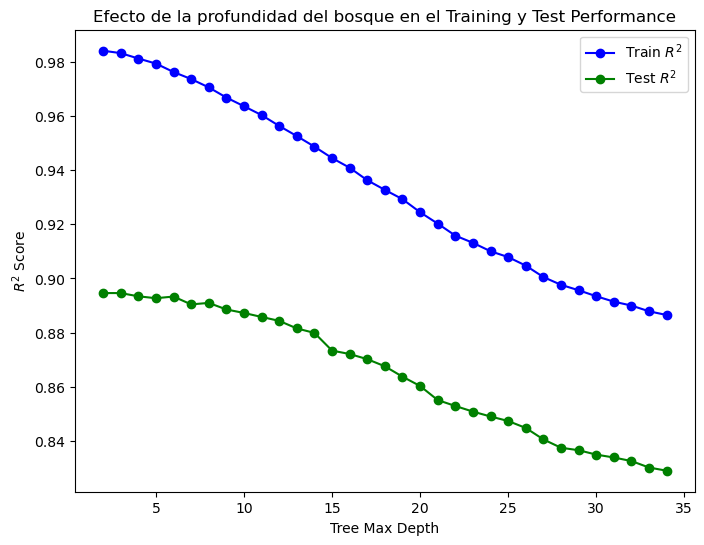

In [557]:
min_samples = range(2, 35)
train_scores = list()
test_scores = list()

for sample in min_samples:
    tree = RandomForestRegressor(min_samples_split=sample, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))


plt.figure(figsize=(8, 6))
plt.plot(min_samples, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

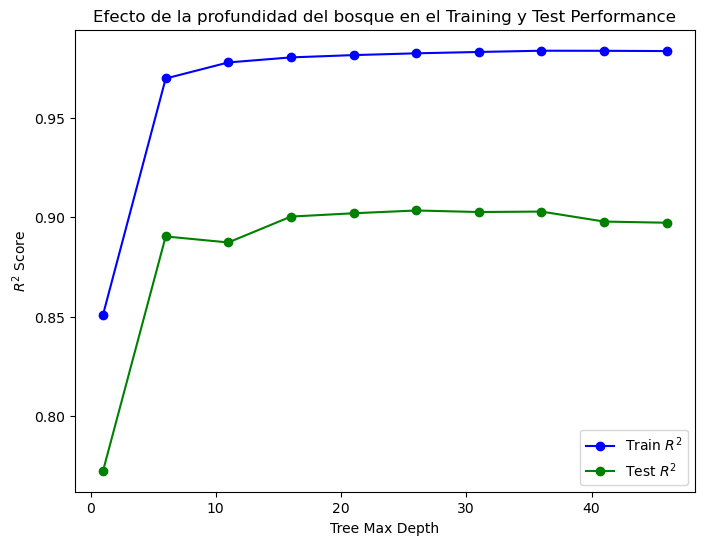

In [558]:
estimators = range(1,50, 5)
train_scores = []
test_scores = []

for estimator in estimators:
    tree = RandomForestRegressor(n_estimators=estimator, random_state=22)
    tree.fit(X_train_nocorr, y_train)
    train_scores.append(tree.score(X_train_nocorr, y_train))
    test_scores.append(tree.score(X_test_nocorr, y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(estimators, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(estimators, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

In [559]:
rf_param = { "n_estimators": [6,7,8],
             "min_samples_split": [2, 3, 4, 5, 6],
             "max_depth": [4, 5, 6]}

rfr = RandomForestRegressor(criterion="squared_error", min_samples_leaf=2, bootstrap=True, oob_score=False, random_state= 22)

grid = GridSearchCV(estimator= rfr, param_grid= rf_param, scoring="neg_mean_squared_error", cv=4, verbose=1)

grid.fit(X_train_nocorr, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=22),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [6, 7, 8]},
             scoring='neg_mean_squared_error', verbose=1)

In [560]:
print(f"Los mejores parámetros para el Random Forest son {grid.best_params_}")

Los mejores parámetros para el Random Forest son {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 8}


In [561]:
rfr_nuevo = RandomForestRegressor(criterion="squared_error", min_samples_leaf=2, max_depth=6, min_samples_split=5, 
                                  n_estimators=8, bootstrap=True, oob_score=False, random_state=22)
rfr_nuevo.fit(X_train_nocorr, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=8, random_state=22)

In [562]:
y_hat_nuevo = rfr_nuevo.predict(X_test_nocorr)
r2_nuevo = metrics.r2_score(y_test, y_hat_nuevo)
print(f"R2: {r2_nuevo}")

R2: 0.8802101164523175


# Clasificación

Para empezar la segunda parte del proyecto,  crearemos un modelo de clasificación que prediga la posición de un jugador de la NBA, primero debemos entender las características distintivas de cada posición en el baloncesto profesional. En la NBA, las posiciones principales son base (PG), escolta (SG), alero (SF), ala-pívot (PF), guardia (G), delantero pequeño (F) y pívot (C). Cada posición tiene un conjunto único de atributos físicos y habilidades en la cancha, como altura, peso, velocidad, precisión en el tiro, capacidad de rebote y habilidad para asistir. Estos rasgos son clave para un modelo de clasificación, ya que permiten diferenciar entre las posiciones basadas en las características y estadísticas individuales de cada jugador.

In [563]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [564]:
df.shape

(539, 30)

### Creación de X y Y

In [565]:
X_C = df_r.drop(['POS', 'PName', 'Team'], axis = 1)
Y_C = df_r['POS']

### Train Test Split

In [566]:
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, Y_C, test_size= 0.2, random_state=444, stratify= Y_C)

Sabemos que no hay datos faltantes ya que en la variable `df_r` no los hay.

De todas formas, corroboramos:

In [567]:
X_train_C.isna().sum()

Age     0
GP      0
W       0
L       0
Min     0
PTS     0
FGM     0
FGA     0
FG%     0
3PM     0
3PA     0
3P%     0
FTM     0
FTA     0
FT%     0
OREB    0
DREB    0
REB     0
AST     0
TOV     0
STL     0
BLK     0
PF      0
FP      0
DD2     0
TD3     0
+/-     0
dtype: int64

In [568]:
y_train_C.isna().sum()

0

### Ajuste en la variable objetivo

In [569]:
y_train_C.unique()

array(['PG', 'SG', 'PF', 'C', 'SF', 'G', 'F'], dtype=object)

Tenemos un problema multiclase, existen 7 posiciones a las que un jugador puede pertenecer. Sin embargo, las posiciones `SG` y `PG` son derivadas de la posición `G`, al igual que `SF` y `PF` pertenecen a `F`. Por lo que, podemos englobar todas las posiciones en solo tres clases: `G`, `F` y `C`. 

Esto mejoraría el rendimiento del modelo y evitamos problemas donde un jugador pueda pertenecer a más de una clase.

In [570]:
replace_dict = {'SG': 'G', 'PG': 'G', 'PF': 'F', 'SF': 'F'}
y_train_C = y_train_C.replace(replace_dict)
y_train_C.unique()

array(['G', 'F', 'C'], dtype=object)

Veamos como quedaría la distribución con este cambio:

<Axes: xlabel='POS', ylabel='count'>

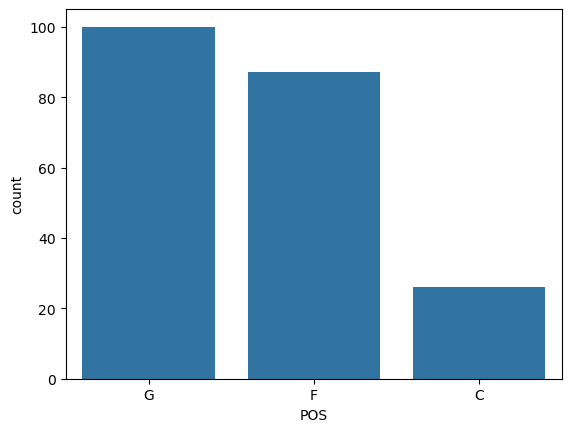

In [571]:
sns.countplot(x = y_train_C)

In [572]:
y_train_C.value_counts()

POS
G    100
F     87
C     26
Name: count, dtype: int64

Nuestra variable objetivo esta muy imbalanceada, esto puede llevar al sobreajuste en las variables mayoritarias y poco aprendizaje de la variable `C`. Para solucionar esto, usaremos un SMOTE.

Primero codificamos la variable objetivo a clases númericas.

In [573]:
y_train_C = le.fit_transform(y_train_C)
y_train_C = pd.Series(y_train_C)

In [574]:
smote = SMOTE()

In [575]:
X_smote_C, y_smote_C = smote.fit_resample(X_train_C, y_train_C)

In [576]:
y_smote_C.value_counts()

2    100
1    100
0    100
Name: count, dtype: int64

Text(0.5, 0, 'POS')

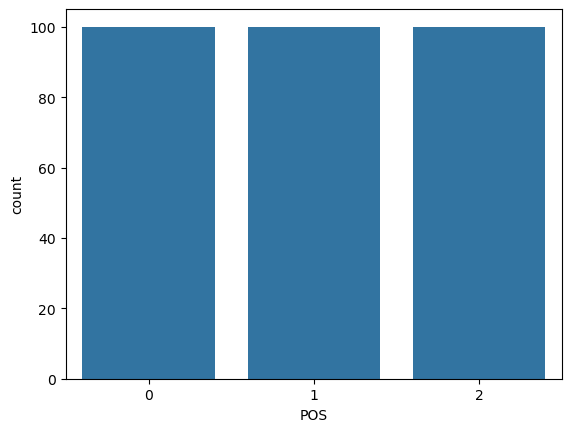

In [577]:
ax = sns.countplot(x = y_smote_C)
ax.set_xlabel('POS')

La variable objetivo ya tiene una distribución que nos permite el entrenamiento óptimo del modelo.


Sin embargo, seguimos teniendo las mismas variables con una alta correlación, lo que sigue es hacer la selección de variables.

### Selección de Variables

Ya que la variable a predecir es categorica, pero los inputs son numéricos, un buen método de selección de variables es el método de ANOVA

In [578]:
significativas = []
ns = []
var_num = X_smote_C.columns

unique_values = y_smote_C.astype(str).unique()

for variable in var_num:
    
    grupos = []
    for valor in unique_values:
        grupo = X_smote_C[y_smote_C.astype(str) == valor][variable]
        
        if len(grupo) > 0:
            grupos.append(grupo)
    
    if len(grupos) > 0:
        F,p = stats.f_oneway(*grupos)
    
        if p < 0.05:
            significativas.append(variable)
        else:
            ns.append(variable)
    
    else:
        print(f"La variable {variable} no se tomó en cuenta por falta de componentes en el grupo")
       
print(f"Las variables significativas para predecir POS son {significativas}")
print(f"Las variables no significativas para predecir POS son {ns}")

Las variables significativas para predecir POS son ['L', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2']
Las variables no significativas para predecir POS son ['Age', 'GP', 'W', 'Min', 'PTS', 'FGM', 'FTM', 'FTA', 'TD3', '+/-']


In [579]:
X_smote_Ca = X_smote_C[significativas]
X_smote_Ca.head()

,L,FGA,FG%,3PM,3PA,3P%,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2
0,35,452,41.2,24,111,21.6,73.6,27,140,167,261,82,75,25,122,1284,1
1,22,382,49.2,133,269,49.4,94.9,15,143,158,91,46,32,5,82,937,0
2,23,328,48.8,30,104,28.8,74.4,38,106,144,69,46,18,17,99,772,0
3,26,595,43.9,103,266,38.7,78.0,8,140,148,136,57,43,17,57,1208,0
4,35,1114,54.0,1,12,8.3,80.6,184,504,688,240,187,88,61,208,2975,31


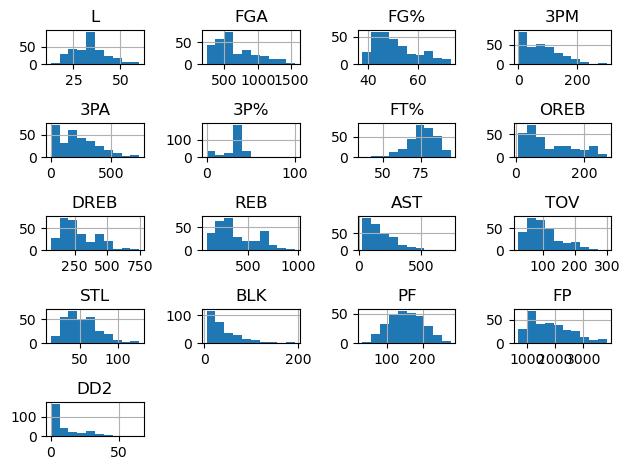

In [580]:
X_smote_Ca.hist()
plt.tight_layout()

Por último, revisemos si tenemos outliers en los datos.

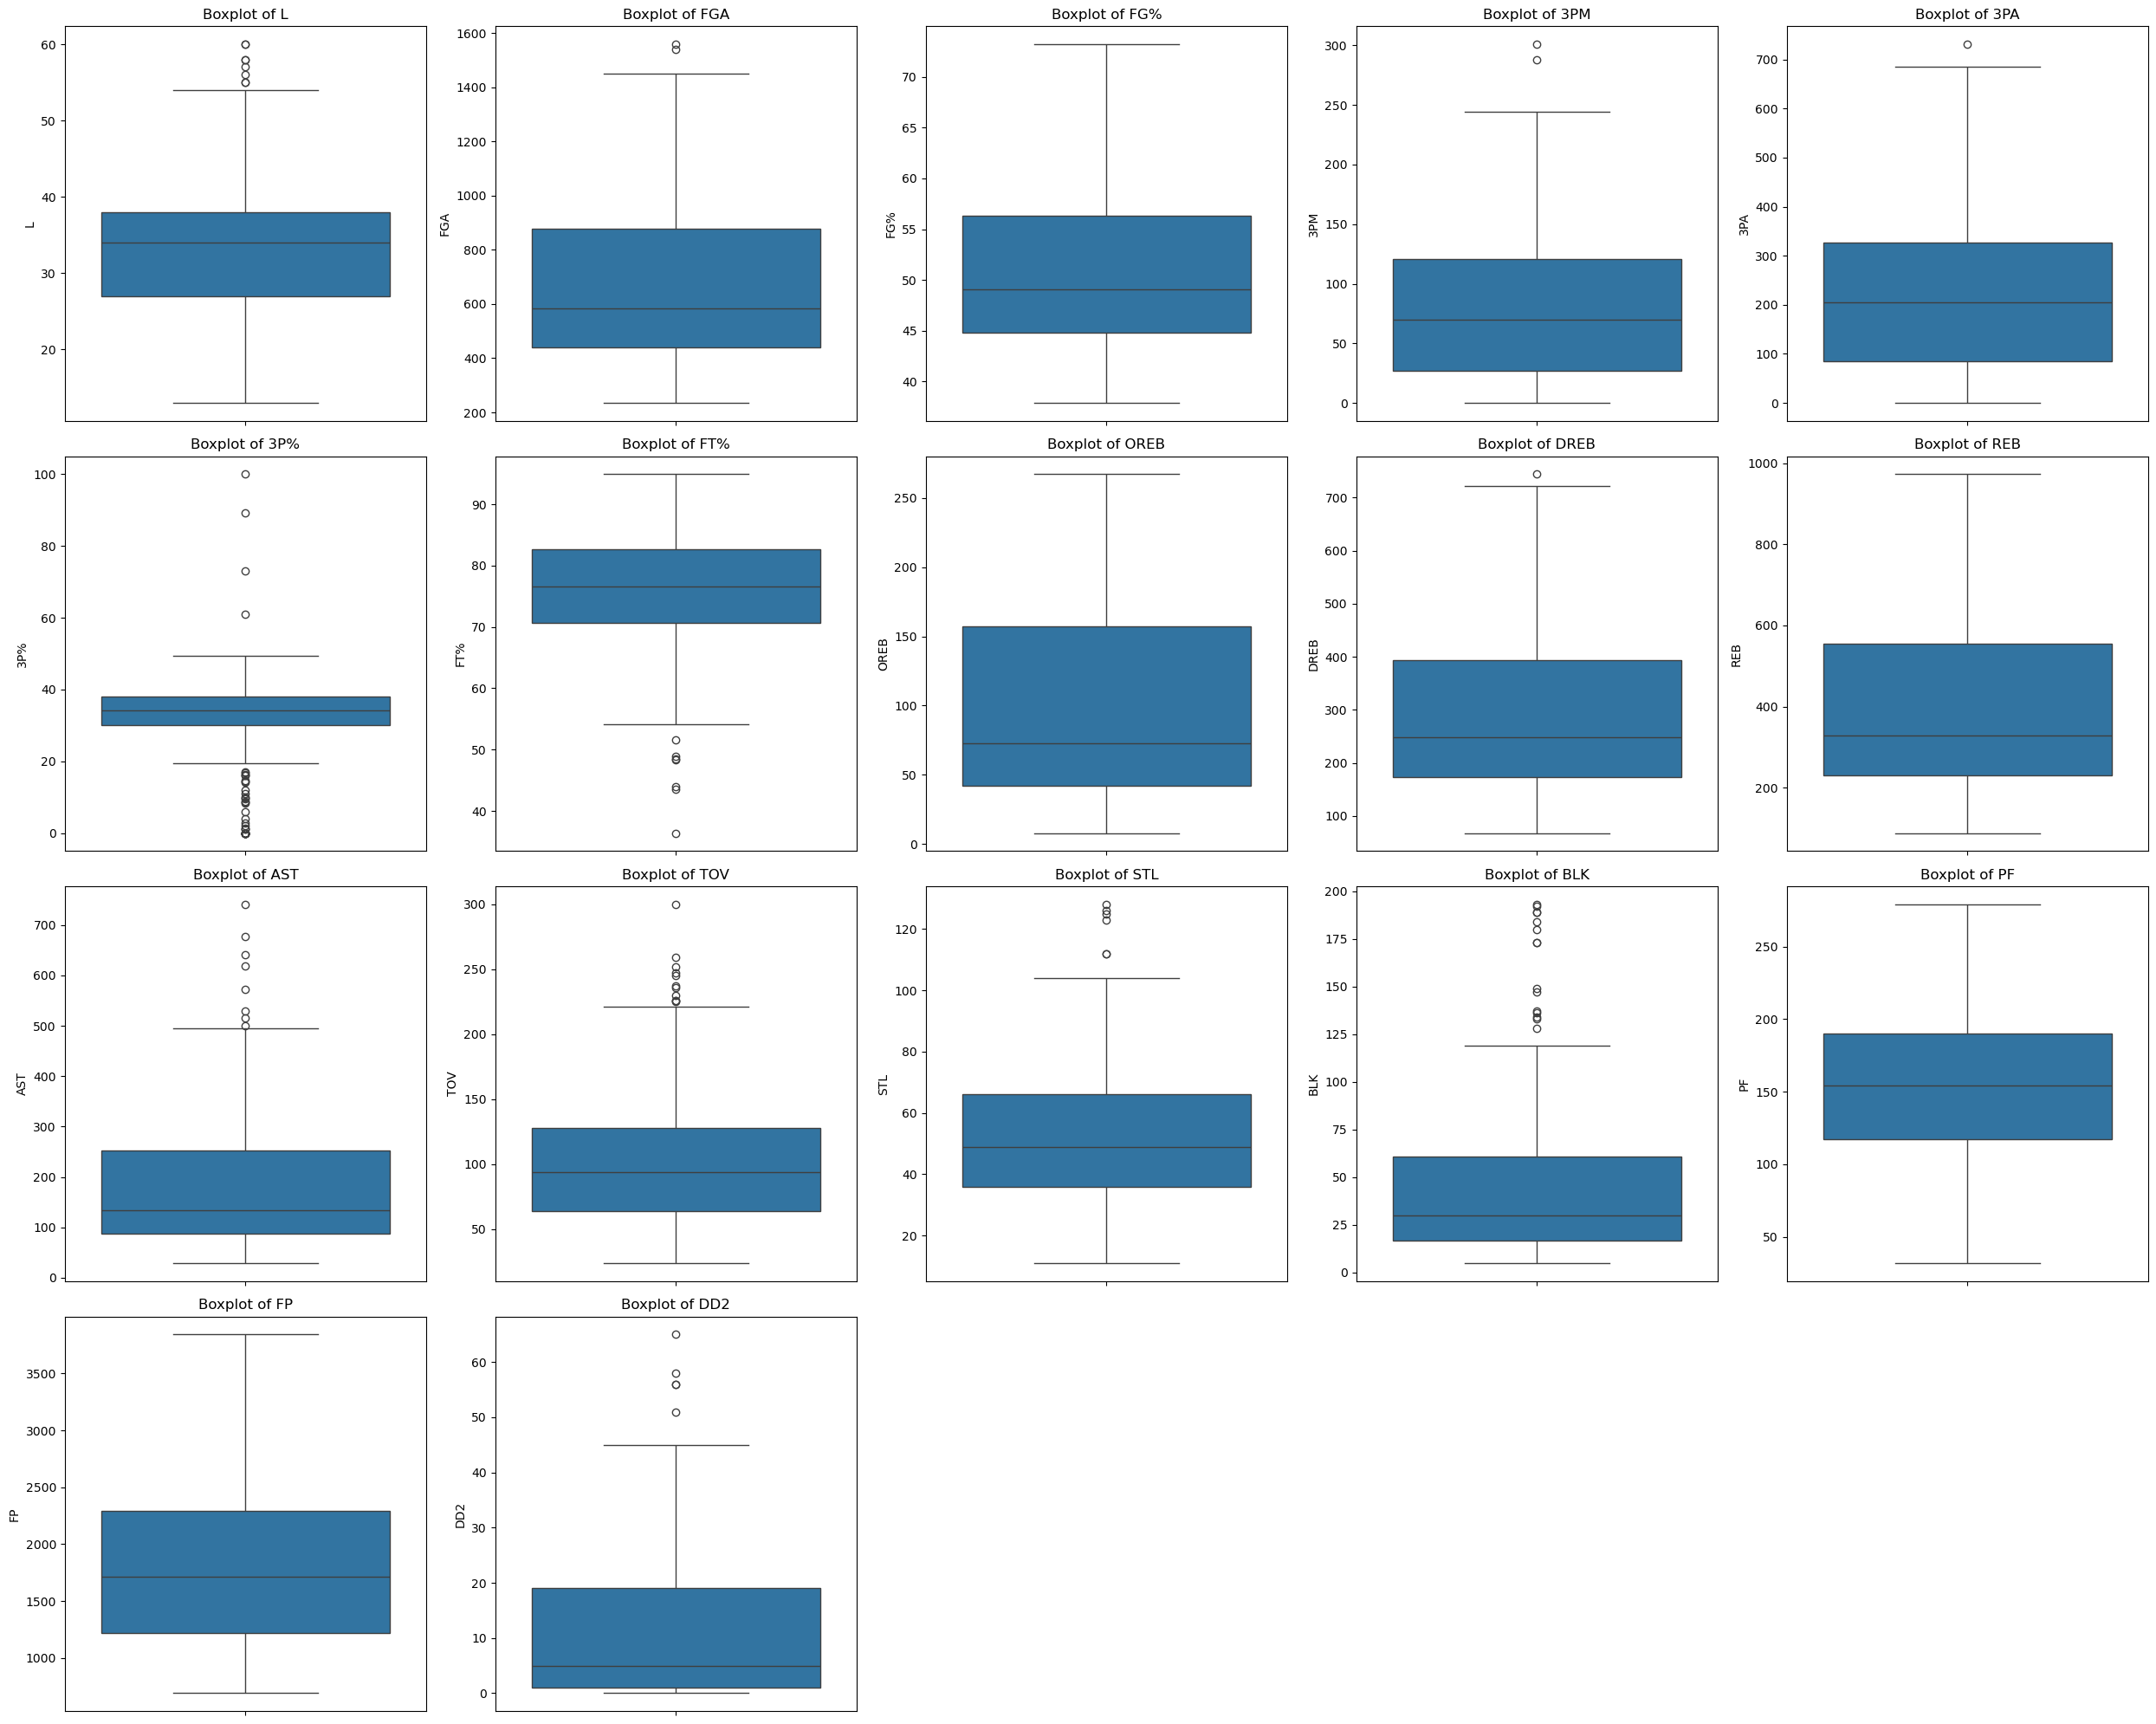

In [581]:
plot_boxplots(X_smote_Ca)

## Modelado

Todo parece apuntar que, por la distribución de los datos, la cantidad disponible de estos y la naturaleza de la variable a predecir, el modelo que nos podría dar los mejores resultados sería una Supported Vector Classifier (SVC)

Aún así, realizaremos pruebas con diferentes modelos para comprobar o refutar nuestra hipotesis.

La métrica con la que evaluaremos sera el accuracy ya que, como hemos balanceado nuestra variable objetivo, queremos obtener una idea general de que tambien clasifican los modelos.

Bibliotecas para la evaluación de los modelos:

In [582]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [583]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=444)

Pongamos los datos de prueba en el mismo formato que los datos de entrenamiento para poder tener una referencia de datos no vistos al evaluar.

In [584]:
X_test_Ca = X_test_C[significativas]

In [585]:
y_test_C = y_test_C.replace(replace_dict)
y_test_C = le.fit_transform(y_test_C)
y_test_C = pd.Series(y_test_C)

### Supported Vector Classifier (SVC)

In [586]:
from sklearn.svm import SVC

Este algoritmo funciona muy bien si se tiene un conjunto de datos estandarizados, haremos una transformación para mejorar esto.

In [587]:
sscaler_X = StandardScaler()

X_smote_Ca_scaled = sscaler_X.fit_transform(X_smote_Ca)
X_test_Ca_scaled = sscaler_X.fit_transform(X_test_Ca)

Una vez escalados los datos, podemos empezar a entrenar el modelo.

Busquemos los mejores parametros:

In [588]:
svc = SVC(kernel = 'rbf')

param_grid_svc = {
    'C': [0.1, 1, 10, 25, 50, 100, 150],        
    'gamma': [0.07, 0.08, 0.09, 0.1, 0.11], 
    'class_weight': [None, 'balanced'] 
}

grid_svc = GridSearchCV(estimator= svc, param_grid= param_grid_svc, scoring="accuracy", cv=k_fold , verbose=1, error_score="raise")
grid_svc.fit(X_smote_Ca_scaled, y_smote_C)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=444, shuffle=True),
             error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 25, 50, 100, 150],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.07, 0.08, 0.09, 0.1, 0.11]},
             scoring='accuracy', verbose=1)

In [589]:
grid_svc.best_params_

{'C': 50, 'class_weight': None, 'gamma': 0.08}

In [590]:
svc = SVC(kernel = 'rbf', C= 50, class_weight= None, gamma = 0.08)

In [591]:
SVCCV_accuracy = (cross_val_score(svc, X_smote_Ca_scaled, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV_accuracy

0.8266666666666668

Veamos los resultados con datos que no ha visto:

In [592]:
SVCCV_accuracy_test = (cross_val_score(svc, X_test_Ca_scaled, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVCCV_accuracy_test

0.8

En general son buenos resultados y es compacto computacionalmente, se entreno más rápido gracias a que sabiamos el tipo de kernel que iba a usar.

### Decision Trees

In [593]:
from sklearn.tree import DecisionTreeClassifier

En este caso, no nos conviene estandarizar los datos porque no es realmente necesario para el modelo.

In [594]:
dtree = DecisionTreeClassifier()

param_grid_dtree = {
    'criterion': ['gini', 'entropy'],       
    'max_depth': [None, 5, 10, 15, 20],      
    'min_samples_split': [2, 5, 10, 15],     
    'min_samples_leaf': [1, 2, 5, 10],      
    'max_features': ['sqrt', 'log2'], 
    'class_weight': [None, 'balanced']      
}

grid_trees = GridSearchCV(estimator= dtree, param_grid= param_grid_dtree, scoring="accuracy", cv=5 , verbose=1, error_score="raise")

grid_trees.fit(X_smote_Ca, y_smote_C)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


c:\Users\Rafa\anaconda3\envs\Lab_datos\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy', verbose=1)

In [595]:
print(grid_trees.best_params_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [596]:
dtree = grid_trees.best_estimator_
dtree

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=5)

In [597]:
DTREECV_accuracy = (cross_val_score(dtree, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_accuracy

0.72

Con datos nuevos:

In [598]:
DTREECV_accuracy_test = (cross_val_score(dtree, X_test_Ca, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
DTREECV_accuracy_test

0.6666666666666667

El tuneo de hiperparametros fue más tardado que el de SVC, esto se debe a la cantidad de parametros que tiene. Además, los resultados no fueron tan buenos como los del decision trees.

A continuación haremos los pesos pesados, estos son modelos más complicados computacionalmente pero que nos pueden hacer obtener mejores resultados.

### XGBoost

In [599]:
from xgboost import XGBClassifier

Si quisieramos buscar los parametros solo con un GridSearch como lo hemos hecho en los modelos anteriores, el fine-tuning tardaría bastante tiempo. Así que, usaremos gráficas para darnos una idea de donde se podrían encontrar los valores optimos y posteriormente haremos el GridSearch.

In [600]:
xgbc = XGBClassifier(objective= "multi:softmax", seed=444)

In [601]:
XGBCCV_accuracy = (cross_val_score(xgbc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy

0.8033333333333333

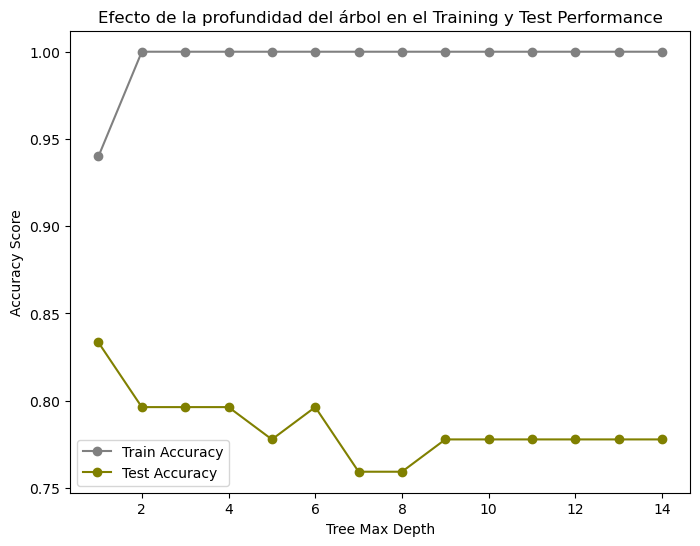

In [609]:
max_depth = range(1, 15)
train_scores = []
test_scores = list()

for depth in max_depth:
    xgbc = XGBClassifier(max_depth = depth, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_scores, label='Train Accuracy', color='gray', marker='o')
plt.plot(max_depth, test_scores, label='Test Accuracy', color='olive', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()



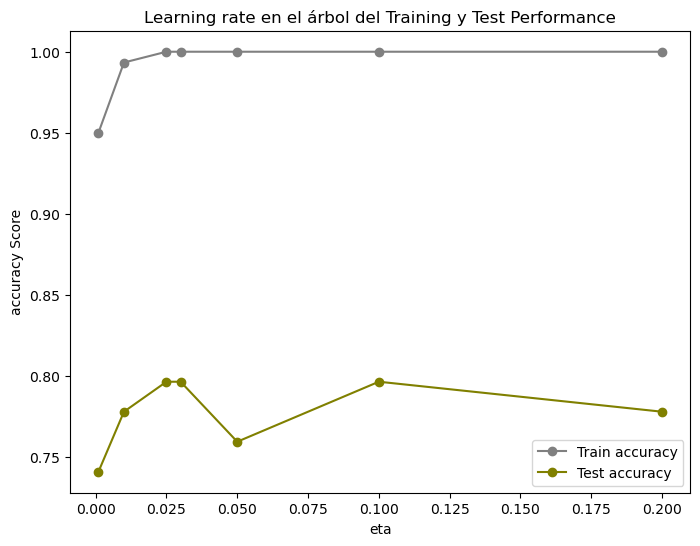

In [603]:
eta = [0.001, 0.01, 0.025, 0.03, 0.05, 0.1, 0.2]
train_scores = []
test_scores = list()

for value in eta:
    xgbc = XGBClassifier(learning_rate = value, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(eta, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(eta, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('eta')
plt.ylabel('accuracy Score')
plt.title('Learning rate en el árbol del Training y Test Performance')
plt.legend()
plt.show()

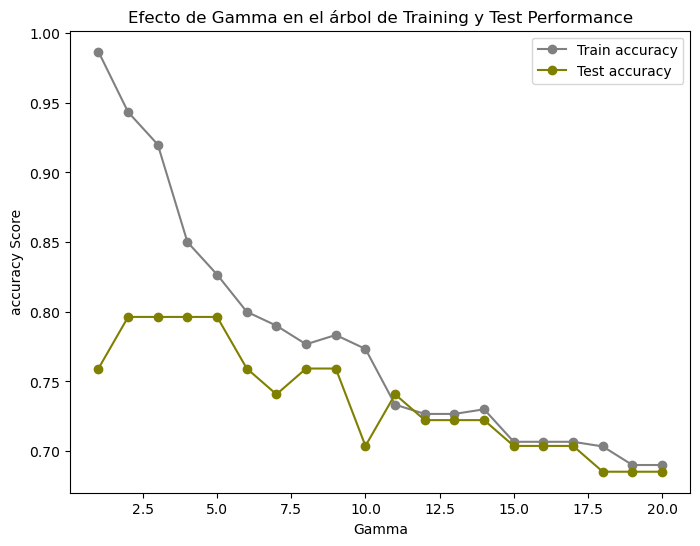

In [604]:
gammas = range(1, 21)
train_scores = []
test_scores = list()

for gamma in gammas:
    xgbc = XGBClassifier(gamma = gamma, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(gammas, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Gamma')
plt.ylabel('accuracy Score')
plt.title('Efecto de Gamma en el árbol de Training y Test Performance')
plt.legend()
plt.show()

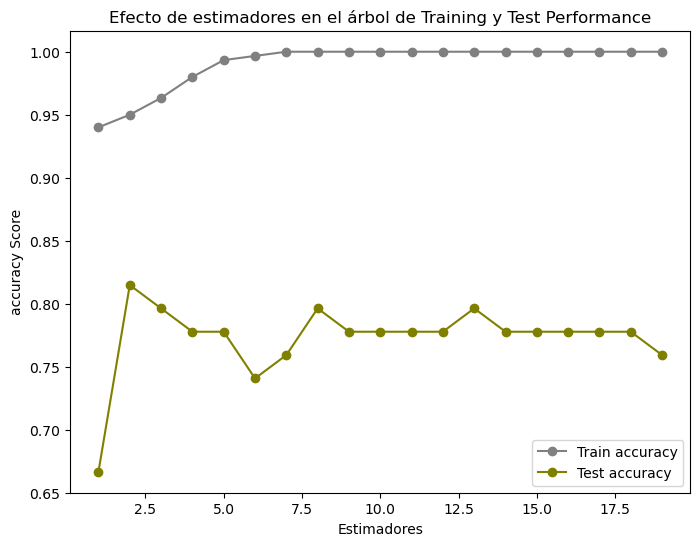

In [605]:
estimators = range(1,20)
train_scores = []
test_scores = list()

for estimator in estimators:
    xgbc = XGBClassifier(n_estimators = estimator, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(estimators, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(estimators, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Estimadores')
plt.ylabel('accuracy Score')
plt.title('Efecto de estimadores en el árbol de Training y Test Performance')
plt.legend()
plt.show()

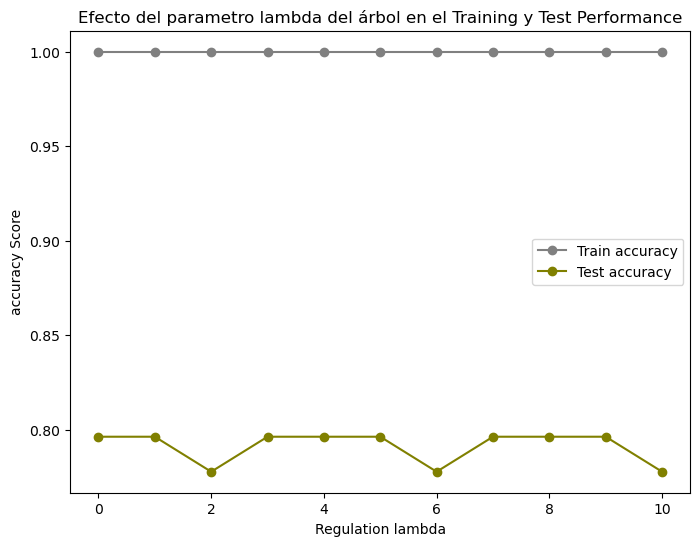

In [606]:
lambdas = range(0, 11)
train_scores = []
test_scores = list()

for lambd in lambdas:
    xgbc = XGBClassifier(reg_lambda = lambd, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(lambdas, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Regulation lambda')
plt.ylabel('accuracy Score')
plt.title('Efecto del parametro lambda del árbol en el Training y Test Performance')
plt.legend()
plt.show()

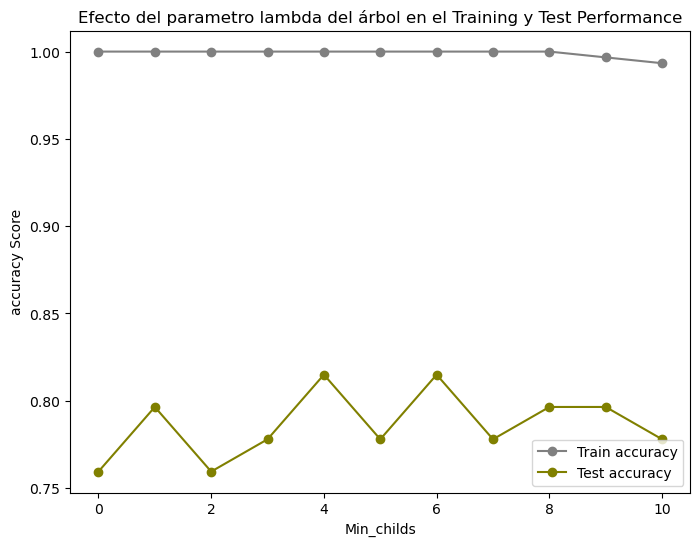

In [607]:
min_childs = range(0, 11)
train_scores = []
test_scores = list()

for child in min_childs:
    xgbc = XGBClassifier(min_child_weight = child, objective= "multi:softmax", seed=444)
    xgbc.fit(X_smote_Ca, y_smote_C)
    train_scores.append(xgbc.score(X_smote_Ca, y_smote_C))
    test_scores.append(xgbc.score(X_test_Ca, y_test_C))
    
plt.figure(figsize=(8, 6))
plt.plot(min_childs, train_scores, label='Train accuracy', color='gray', marker='o')
plt.plot(min_childs, test_scores, label='Test accuracy', color='olive', marker='o')
plt.xlabel('Min_childs')
plt.ylabel('accuracy Score')
plt.title('Efecto del parametro lambda del árbol en el Training y Test Performance')
plt.legend()
plt.show()

Ya tenemos una idea de por donde pueden estar los hiperparametros, aún asi veamos cual es la mejor combinación:

In [610]:
param_grid_xgbc = {"reg_lambda": [0, 1, 3],
             "gamma": [4, 10],
             "learning_rate": [0.01, 0.1, 0.2],
             "max_depth": [1, 3],
             'n_estimators': [2, 5, 13],
             'min_child_weight': [4, 6]}

xgbc = XGBClassifier(objective="multi:softmax", seed=444)

xgbc_grid = GridSearchCV(estimator= xgbc, param_grid= param_grid_xgbc, scoring="accuracy", cv=5, verbose=1)
xgbc_grid.fit(X_smote_Ca, y_smote_C)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'gamma': [4, 10], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3], 'min_child_weight': [4, 6],
                         'n_estimators': [2, 5, 13], 'reg_lambda': [0, 1, 3]},
             scoring='accuracy', verbose=1)

In [611]:
print(xgbc_grid.best_params_)

{'gamma': 4, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 13, 'reg_lambda': 0}


In [612]:
xgbc = xgbc_grid.best_estimator_
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [613]:
XGBCCV_accuracy = (cross_val_score(xgbc, X_smote_Ca, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy

0.7166666666666667

Ahora en los datos de prueba:

In [614]:
XGBCCV_accuracy_test = (cross_val_score(xgbc, X_test_Ca, y_test_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCCV_accuracy_test

0.6900000000000001

### Random Forest

In [615]:
from sklearn.ensemble import RandomForestClassifier

In [617]:
rfc = RandomForestClassifier(n_estimators = 200)

In [623]:
RFCCV = (cross_val_score(rfc, X_smote_C, y_smote_C, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [624]:
RFCCV

0.8133333333333332

1. **Definición del problema**. El estudiante debe definir un problema a ser resuelto, basado en la selección de un conjunto de datos de un problema que sea de su interés. Es importante que los datos seleccionados correspondan a un problema de **clasificación** de forma que cumpla con el objetivo de la sección de este proyecto. Si la selección de los datos es complicada, como sugerencia pueden tomar el que sea de su interés de las siguientes páginas:

http://archive.ics.uci.edu/ml/

https://www.kdnuggets.com/datasets/index.html

https://www.kaggle.com/datasets

https://data.world/

NOTA: Si tienes alguna duda sobre si el dataset elegido es el correcto para el problema a resolver de regresión me puedes consultar y lo analizamos. 

2. **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, datos imbalanceados en la variable de salida, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.  

 

### Engrega 2:

En esta fase se debe entregar lo que se hizo en la entrega 1 con sus respectivas correcciones más los siguientes puntos:

#### Regresión 


3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de regresión para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (MSE, MAE, R2) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 


#### Clasificación

3. **Procesar modelo de regresión:** 
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de clasificación para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (precision, recall, accuracy, f1 score, etc.) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos. 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 

#### Entrega 3

 - Imagina que le estás presentando tu proyecto a tu jefe (tu jefe no es una persona muy técnica que sepa mucho de código) 
 - Sabiendo esto, en esta entrega se pide hacer una presentación donde hables sobre todo lo interesante que viste en tu proyecto, trata de hacer la presentación lo más entendible posible para que tu jefe comprenda todo lo que tuviste que hacer desde un inicio así como los resultados. (No puedes mostrar código, tiene que ser visual y mostrar resultados). 
 - En esta fase se pide entregar las correcciones sugeridas de las dos entregas pasadas. 


### Calificación

La calificación de cada fase del proyecto incluido en el reporte final es la siguiente:

| Fase | Puntuación | Características Generales |
| --- | --- | --- |
| Definición del problema | 15% | 1. Mencionar el origen de los datos <br /> 2.Dar contexto de los datos (significado de las variables si es posible) <br /> 3. Describir de qué se trata el problema a resolver|
| Preparación de datos | 30% | 1. Incluya **gráficos** y métricas utilizadas para describir la base de datos. <br /> 1. Describir el tratamiento de variables que requieren transformación o modificación de valores. |
| Procesar modelo de regresión/clasificación | 40% | 1. Describir el modelo aplicado. <br /> 2. Evaluar el desempeño de cada modelo utilizando métricas comunes para poder realizar la comparación. <br /> 3. Pruebe los modelos utilizando datasets en común para que la comparación sea válida 4. Aplicación del modelo para predecir datos nuevos|
| Discusión de los resultados | 15% | 1. Resalte sus observaciones validadas por las métricas que se muestran dentro del desarrollo. <br /> 2. Dar conclusión personal de los resultados y el uso o aplicación de los modelos. |

### ¿ Qué debe tener cada entregable?


- El informe del trabajo realizado se entregará digitalmente en un documento elaborado en una computadora (no fotografías de hojas o cuadernos), e incluirá como mínimo:
    - Nombre y apellidos de los alumnos.
    - Es obligatorio que incluyan el código que generaron para realizar la práctica.
    - Es obligatorio que incluyan los archivos que contengan los datos a analizar para cada problema (regresión y clasificación)
